# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

# Задача проекта
Построить прототип модели машинного обучения, которая будет предсказывать коэффициент восстановления золота из золотоносной руды.

## Подготовка данных

In [1]:
# Файлы и директории
import os 

# Датафреймы
import pandas as pd

# Математика
import numpy as np

# Статистика
import scipy.stats as stats
from scipy.stats import mannwhitneyu

# Визуализация
import matplotlib.pyplot as plt
import seaborn as sns

# ML-модели
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVR
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyRegressor

# ML-метрики
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import cross_val_score

# Настройки
import warnings
warnings.filterwarnings("ignore")
pd.options.mode.chained_assignment = None

# Константы
RANDOM_NUMBER = 12345
RANDOM_STATE = np.random.RandomState(RANDOM_NUMBER)

### Загрузка

In [2]:
data=[]

paths_1 = ['datasets/gold_industry_train.csv',
           'datasets/gold_industry_test.csv',
           'datasets/gold_industry_full.csv']

paths_2 = ['gold_industry_train.csv',
           'gold_industry_test.csv',
           'gold_industry_full.csv']


for path_1, path_2  in zip(paths_1, paths_2):
    
    if os.path.exists(path_1):
        data.append(pd.read_csv(path_1, parse_dates = ['date']))
    
    elif os.path.exists(path_2):
        data.append(pd.read_csv(path_2, parse_dates = ['date']))
    
    else:
        print('Ошибка загрузки.')

Создадим функцию, которая будет кратко показывать основные характеристики больших датафреймов:

In [3]:
def short_info(df):
    """Отображение краткой информации о датафрейме"""

    print(f"Размерность: {df.shape}")
    print(f"Всего значений: {df.size}")
    print(f"Из них пропущенных: {df.isna().sum().sum()}")
    print(f"Явных дубликатов: {df.duplicated().sum()}")
    display(df.head(3))

Изучим базовую информацию о загруженных данных:

#### Обучающая выборка

In [4]:
train_df = data[0]
short_info(train_df)

Размерность: (14579, 87)
Всего значений: 1268373
Из них пропущенных: 3050
Явных дубликатов: 0


,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,...,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,...,9.001494,42.701629,6.029369,9.968944,5.257781,69.266198,2.224930,10.462676,0.927452,16.634514
2,2016-01-15 02:00:00,6.362222,6.116455,2.159622,35.971630,530.026610,57.510649,11.920603,6.197377,999.719565,...,8.842896,42.657501,6.055926,10.213995,5.383759,68.116445,2.257889,10.507046,0.953716,16.208849


#### Тестовая выборка

In [5]:
test_df = data[1]
short_info(test_df)

Размерность: (4860, 53)
Всего значений: 257580
Из них пропущенных: 375
Явных дубликатов: 0


,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2017-12-09 14:59:59,4.365491,6.158718,3.875727,39.135119,555.820208,94.544358,6.146982,9.308612,1196.238112,...,23.018622,-500.492702,20.020205,-500.220296,17.963512,-499.939490,12.990306,-500.080993,19.990336,-499.191575
1,2017-12-09 15:59:59,4.362781,6.048130,3.902537,39.713906,544.731687,123.742430,6.210119,9.297709,1201.904177,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471
2,2017-12-09 16:59:59,5.081681,6.082745,4.564078,37.208683,558.155110,82.610855,7.363824,9.003562,1200.826926,...,22.993827,-501.559663,20.029144,-500.000662,18.012723,-500.024764,13.016445,-500.058432,19.973767,-501.394155


#### Исходные данные

In [6]:
full_df = data[2]
short_info(full_df)

Размерность: (19439, 87)
Всего значений: 1691193
Из них пропущенных: 4481
Явных дубликатов: 0


,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,...,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,...,9.001494,42.701629,6.029369,9.968944,5.257781,69.266198,2.224930,10.462676,0.927452,16.634514
2,2016-01-15 02:00:00,6.362222,6.116455,2.159622,35.971630,530.026610,57.510649,11.920603,6.197377,999.719565,...,8.842896,42.657501,6.055926,10.213995,5.383759,68.116445,2.257889,10.507046,0.953716,16.208849


**Наблюдения**
* Количество столбцов в обучающей выборке и исходных данных совпадает и равно 87.
* В тестовой выборке отсутствует часть признаков.
* Сумма строк обучающей и тестовой выборки совпадает с количеством строк исходных данных (14579 + 4860 = 19439).
* Явные дубликаты отстутствуют.
* В данных есть пропуски.

### Проврека правильности расчёта эффективности обогащения
#### Recovery

Формула для расчёта:

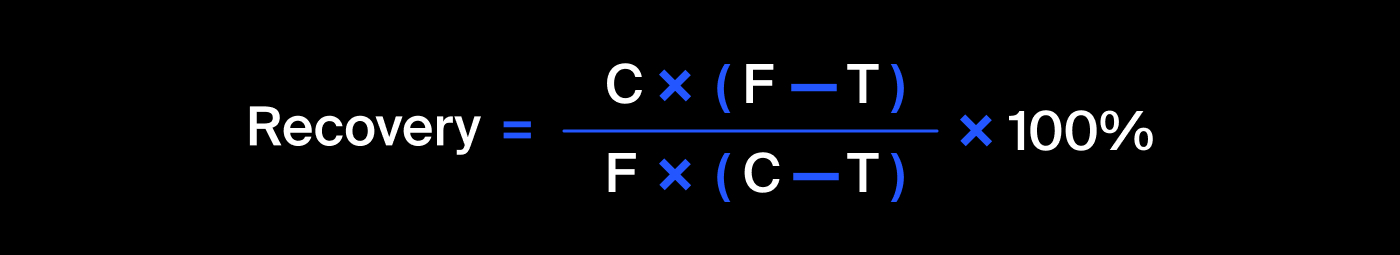

**Recovery = C * (F - T) / (F * (C - T)) * 100%**, где:

* **C** *(concentrate)* — доля золота в концентрате после флотации/очистки;
* **F** *(feed)* — доля золота в сырье/концентрате до флотации/очистки;
* **T** *(tail)* — доля золота в отвальных хвостах после флотации/очистки.

Выделим необходимые параметры для расчёта из тренировочной выборки и рассчитаем по ним эффективность:

In [7]:
# Данная эффективность обогащения
recovery_given = train_df['rougher.output.recovery']

# Доля золота в концентрате после флотации
C = train_df['rougher.output.concentrate_au']

# Доля золота в сырье до флотации
F = train_df['rougher.input.feed_au']

# Доля золота в хвостах после флотации
T = train_df['rougher.output.tail_au']

# Расчётная эффективность обогащения
recovery_calculated = C * (F - T) / (F * (C - T)) * 100

Проверим серии `recovery_given` и `recovery_calculated` на наличие пропусков и выбросов:

In [8]:
print(f"Пропусков: {recovery_given.isna().sum()}")
recovery_given.describe()

Пропусков: 0


count    14579.000000
mean        82.521200
std         15.797521
min          0.000000
25%         80.558542
50%         85.946497
75%         89.960375
max        100.000000
Name: rougher.output.recovery, dtype: float64

In [9]:
print(f"Пропусков: {recovery_calculated.isna().sum()}")
recovery_calculated.describe()

Пропусков: 0


count    14579.000000
mean        82.521200
std         15.797521
min         -0.000000
25%         80.558542
50%         85.946497
75%         89.960375
max        100.000000
dtype: float64

Пропуски отсутствуют, выбросы со значениями больше 100 или меньше 0 не обнаружены.

#### MAE
Рассчитаем среднюю абсолютную ошибку между исходными значенями Recovery и расчётными:

In [10]:
print(f"MAE: {mean_absolute_error(recovery_given, recovery_calculated)}")

MAE: 9.83758577644259e-15


Средняя абсолютная ошибка стремится к нулю, следовательно, эффективность обогащения рассчитана правильно.

### Анализ признаков, недоступных в тестовой выборке
Найдём столбцы, которые необходимо рассмотреть:

In [11]:
sorted(list((set(full_df.columns) - set(test_df.columns))))

['final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

В **обучающей выборке** содержится 87 столбцов — то же количество, что и в исходных данных. Следовательно, она является срезом полного датафрейма с сохранением всех признаков.

В **тестовой выборке** — 53 столбца, в ней отсутствуют признаки, содержащие два типа параметров:
* `output` — выходные параметры сырья/продукта после каждого из этапов
* `calculation` — расчётные характеристики

Следовательно, тестовая выборка является имитацией работы модели в реальных условиях. Чтобы в будущем проверить модель на этой выборке, необходимо выполнить два условия:
1. Удалить из обучающей выборки признаки, которых нет в тестовой.
2. Дополнить тестовую выборку целевыми признаками из исходных данных:
    * `rougher.output.recovery`
    * `final.output.recovery`

### Предобработка

Ранее мы выяснили, что дубликаты в данных отсутствуют, но есть пропущенные значения. Проверим, есть ли пропуски в целевых признаках исходных данных и обучающей выборки:

In [12]:
target_columns = ['rougher.output.recovery', 'final.output.recovery']

print(f"Пропусков в целевых признаках исходных данных: {full_df[target_columns].isna().sum().sum()}")
print(f"Пропусков в целевых признаках обучающей выборки: {(train_df[target_columns].isna().sum().sum())}")

Пропусков в целевых признаках исходных данных: 0
Пропусков в целевых признаках обучающей выборки: 0


Пропуски в целевых признаках отсутствуют.

Так как данные индексируются датой и временем получения информации, соседние по времени параметры часто похожи. Заполним пропуски с помощью метода `'ffill'`, который заменяет пропущенное значение ближайшим ненулевым значением в столбце.

In [13]:
full_df = full_df.fillna(method='ffill')
train_df = train_df.fillna(method='ffill')

# Проверка
print(f"Пропусков в исходных данных: {full_df.isna().sum().sum()}")
print(f"Пропусков в обучающеё выборке: {train_df.isna().sum().sum()}")

Пропусков в исходных данных: 0
Пропусков в обучающеё выборке: 0


Пропуски в исходных данных и обучающей выборке обработаны.

### Итоги этапа
В ходе подготовительной работы мы смогли:
1. Успешно загрузить все три датасета.
2. Убедиться в правильности расчёта Recovery (эффективности обогащения).
3. Проанализировать недостающие признаки в тестовой выборке и выдвинуть гипотезу о причине их появления.
4. Предобработать данные, избавившись от пропусков.

## Анализ данных

### Изменение концентрации металлов

Схема технологического процесса:

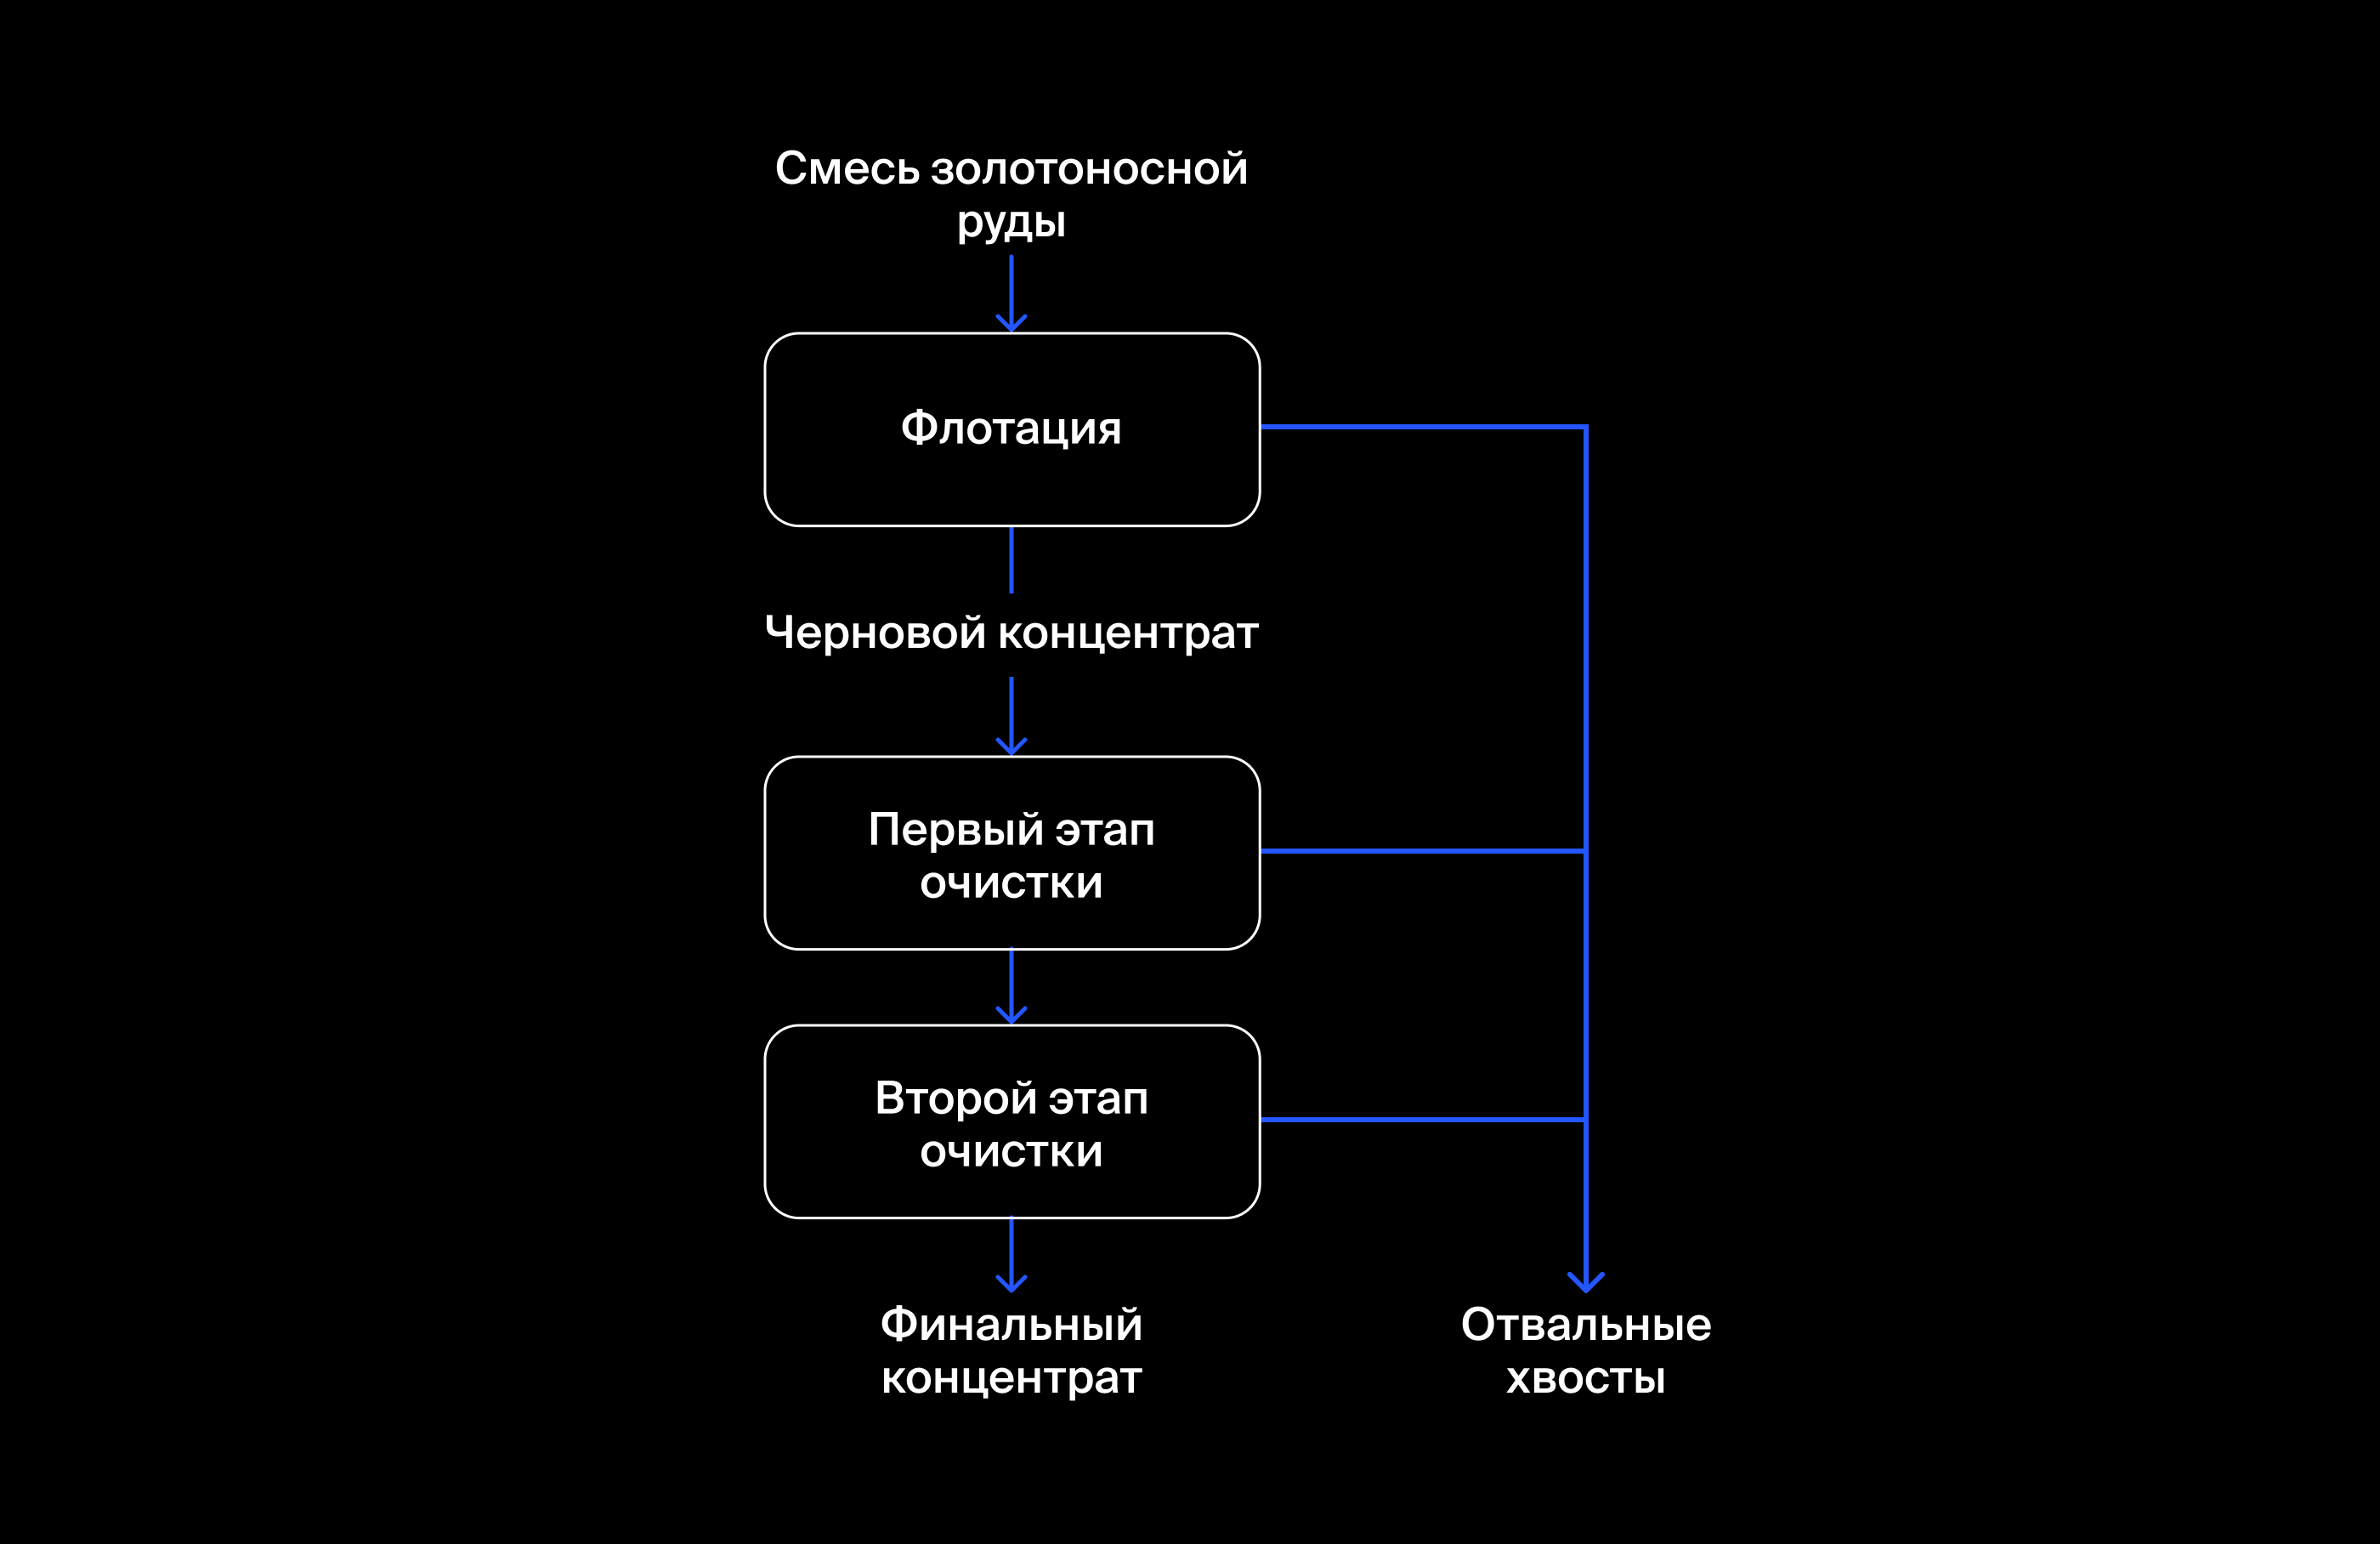

Необходимо понять, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах:
* в сырье,
* в черновом концентрате,
* в концентрате после первой очистки,
* в финальном концентрате.

#### Сырьё

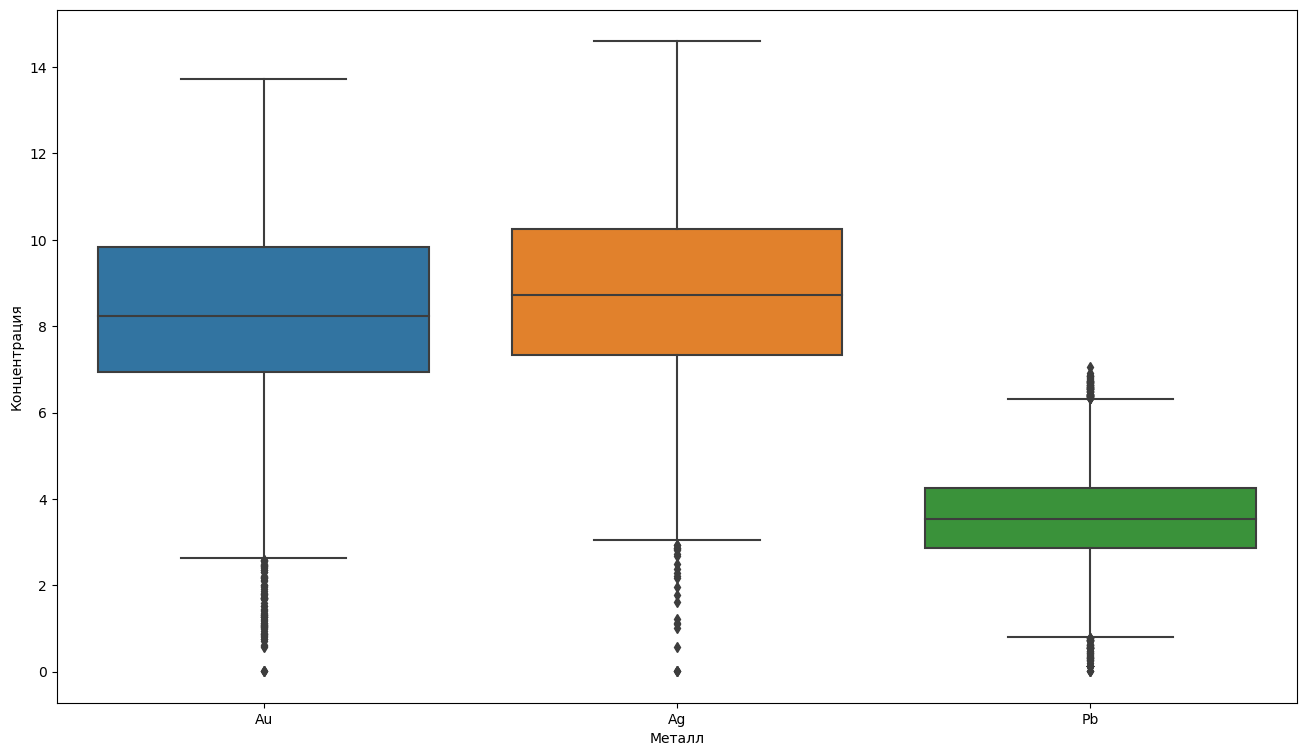

In [14]:
plt.figure(figsize=(16,9))
sns.boxplot(data=train_df[['rougher.input.feed_au',
                           'rougher.input.feed_ag',
                           'rougher.input.feed_pb']])

plt.ylabel('Концентрация')
plt.xlabel('Металл')
plt.xticks(ticks=[0, 1, 2],
           labels=['Au', 'Ag','Pb'])

plt.show()

#### Черновой концентрат

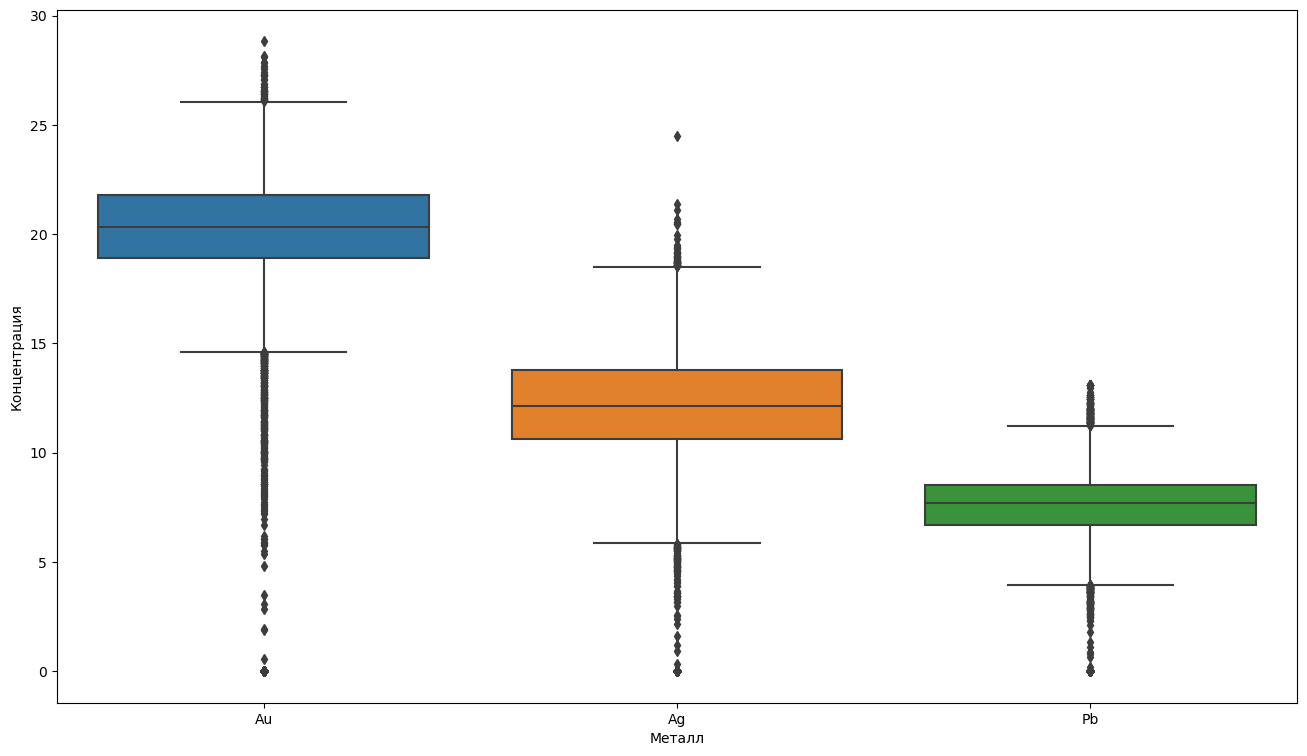

In [15]:
plt.figure(figsize=(16,9))
sns.boxplot(data=train_df[['rougher.output.concentrate_au',
                           'rougher.output.concentrate_ag',
                           'rougher.output.concentrate_pb']])
plt.ylabel('Концентрация')
plt.xlabel('Металл')
plt.xticks(ticks=[0, 1, 2],
           labels=['Au', 'Ag','Pb'])

plt.show()

#### Концентрат после первой очистки

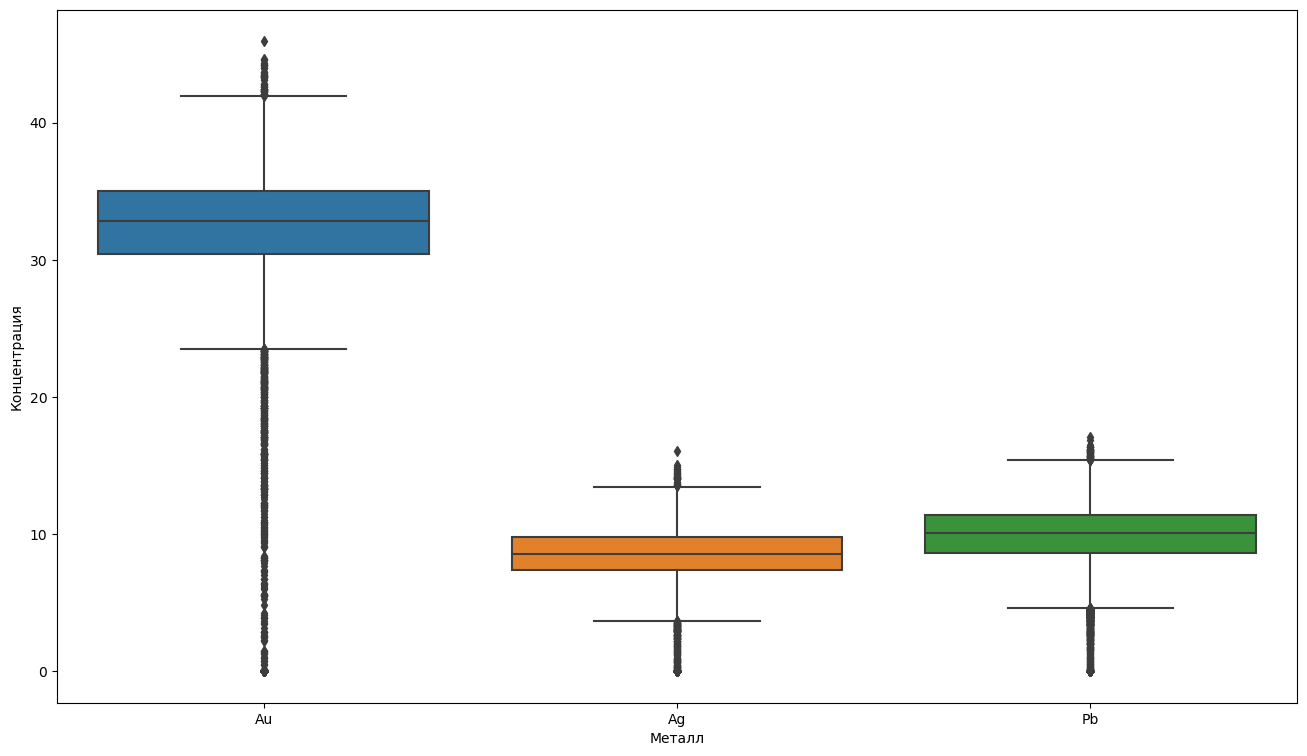

In [16]:
plt.figure(figsize=(16,9))
sns.boxplot(data=train_df[['primary_cleaner.output.concentrate_au',
                           'primary_cleaner.output.concentrate_ag',
                           'primary_cleaner.output.concentrate_pb']])

plt.ylabel('Концентрация')
plt.xlabel('Металл')
plt.xticks(ticks=[0, 1, 2],
           labels=['Au', 'Ag','Pb'])

plt.show()

#### Финальный концентрат

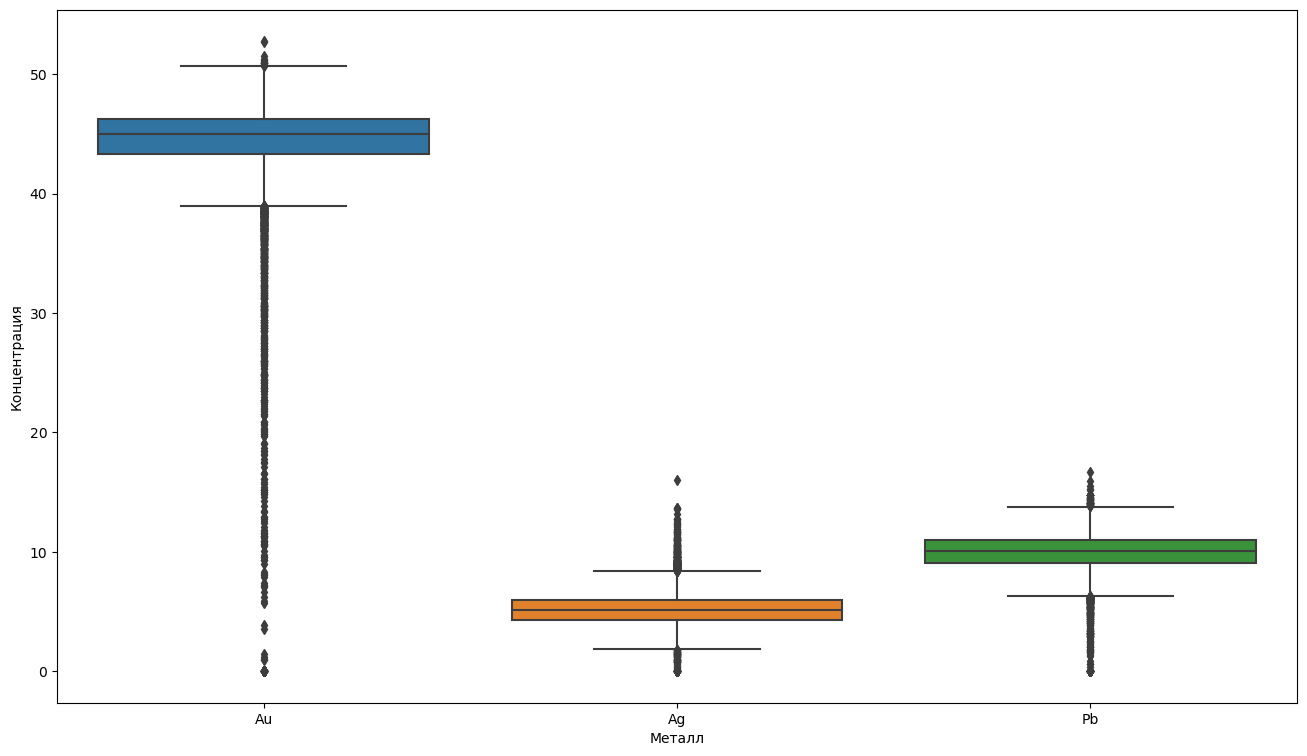

In [17]:
plt.figure(figsize=(16,9))
sns.boxplot(data=train_df[['final.output.concentrate_au',
                           'final.output.concentrate_ag',
                           'final.output.concentrate_pb']])

plt.ylabel('Концентрация')
plt.xlabel('Металл')
plt.xticks(ticks=[0, 1, 2],
           labels=['Au', 'Ag','Pb'])

plt.show()

**Наблюдения**
* Концентрация золота стабильно растёт от этапа к этапу.
* Концентрация серебра, наборот, сокращается почти в три раза.
* Концентрация свинца увеличивается после этапа первой очистки, оставаясь практически неизменной в финальном концентрате.

На диаграмме размаха наблюдается значительное количество нижних выбросов. Вероятно, это обусловлено неравномерностью гранул сырья и распределением металлов в них. Причины появления выбросов и более точную оценку этих значений может дать специалист в области обработки руды.

Отделим самые явные выбросы по 5-му перцентилю:

In [18]:
# Перцентиль, определящий порог 
Q = 0.05

concentrate_columns = ['rougher.input.feed_au',
                       'rougher.input.feed_ag',
                       'rougher.input.feed_pb',
                      
                       'rougher.output.concentrate_au',
                       'rougher.output.concentrate_ag',
                       'rougher.output.concentrate_pb',
                       
                       'primary_cleaner.output.concentrate_au',
                       'primary_cleaner.output.concentrate_ag',
                       'primary_cleaner.output.concentrate_pb',
                       
                       'final.output.concentrate_au',
                       'final.output.concentrate_ag',
                       'final.output.concentrate_pb']

mask = (train_df[concentrate_columns] < train_df[concentrate_columns].quantile(Q)).any(axis=1)
filtered_df = train_df[~mask]

Проверим распределения в отфильтрованном датафрейме на примере первого этапа `rougher.input.feed`:

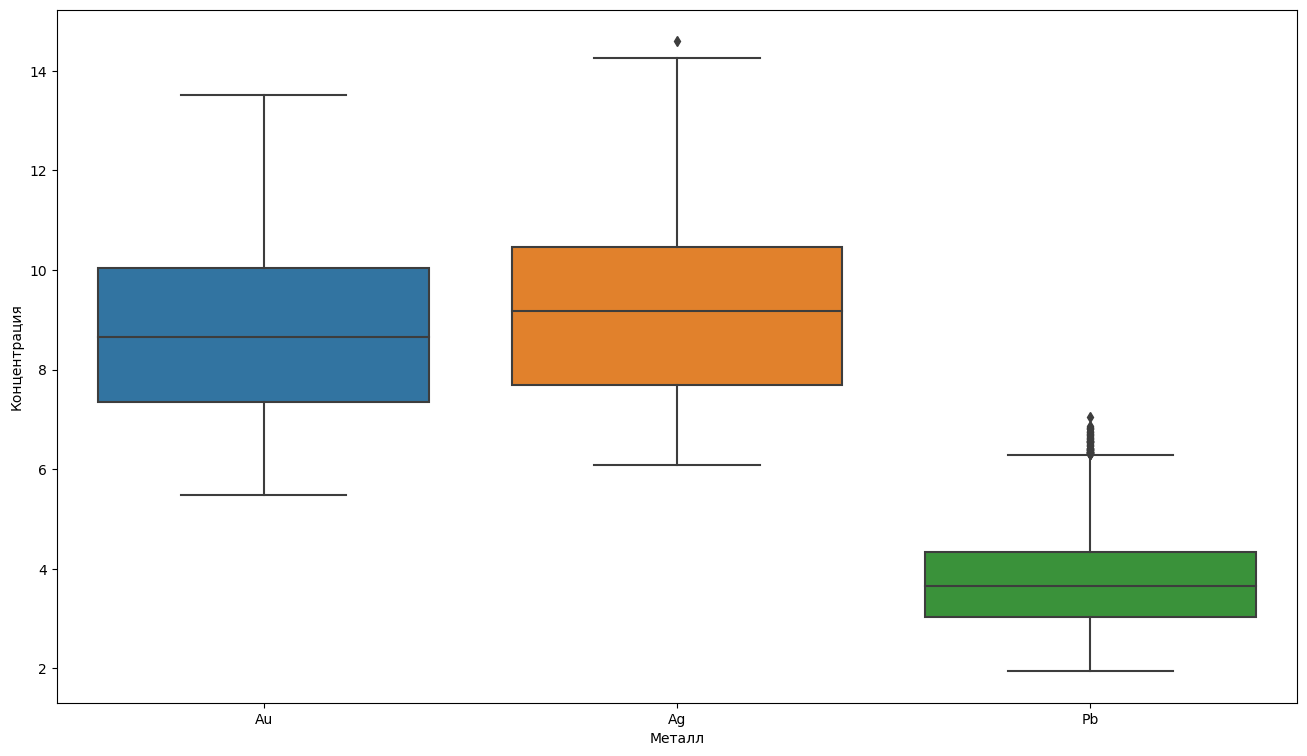

In [19]:
plt.figure(figsize=(16,9))
sns.boxplot(data=filtered_df[['rougher.input.feed_au',
                              'rougher.input.feed_ag',
                              'rougher.input.feed_pb']])
plt.ylabel('Концентрация')
plt.xlabel('Металл')
plt.xticks(ticks=[0, 1, 2],
           labels=['Au', 'Ag','Pb'])

plt.show()

Медианные значения сместились незначительно. Нижние выбросы отсутствуют. Сохраним отфильтрованный датафрейм в основную тренировочную выборку:

In [20]:
train_df = filtered_df

### Распределение размеров гранул

Проверим, насколько сильно отличаются друг от друга параметры исходного сырья на обучающей и тестовой выборках.

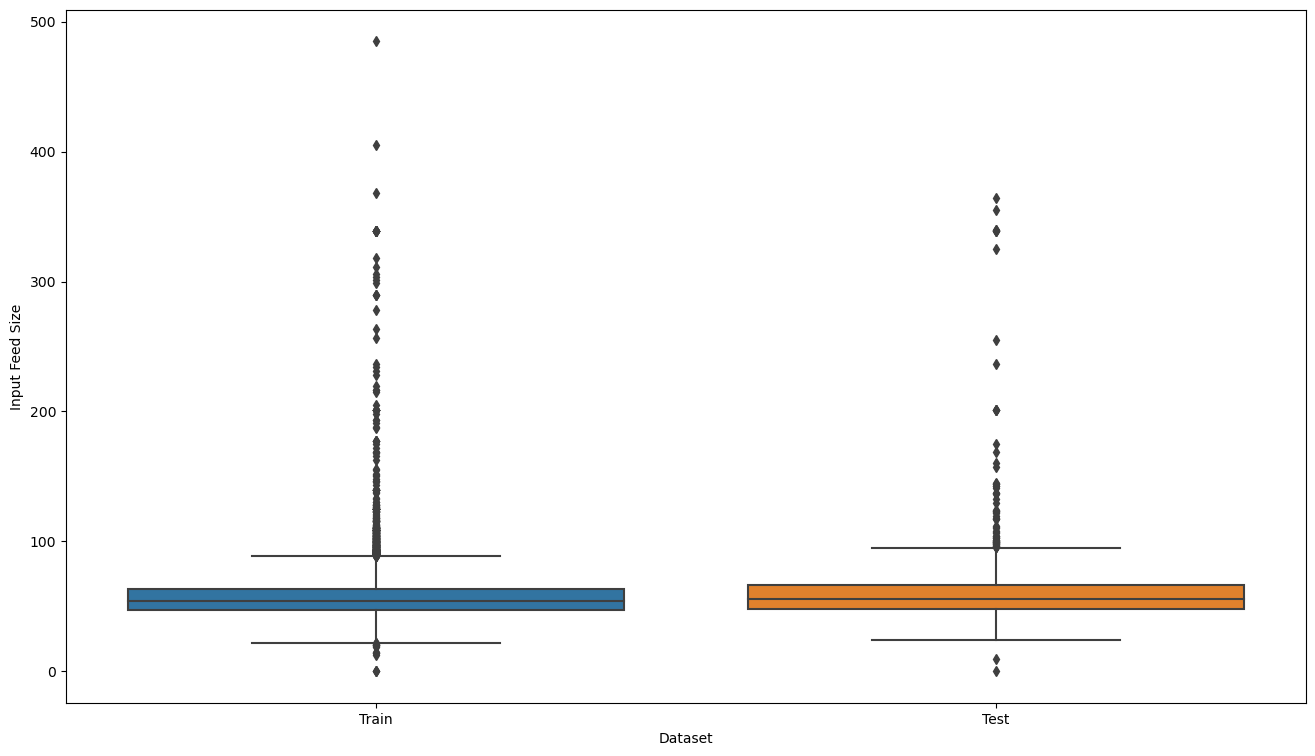

In [21]:
plt.figure(figsize=(16, 9))

sns.boxplot(data=[train_df['rougher.input.feed_size'],
                  test_df['rougher.input.feed_size']])

plt.xticks(ticks=[0, 1], labels=['Train', 'Test'])
plt.xlabel('Dataset')
plt.ylabel('Input Feed Size')
plt.show()

За исключением выбросов, распределение размеров гранул исходного сырья в обучающей и тестовой выборке преимущественно одинаковы. За счёт этого, будущая модель будет ошибаться с меньшей вероятностью.

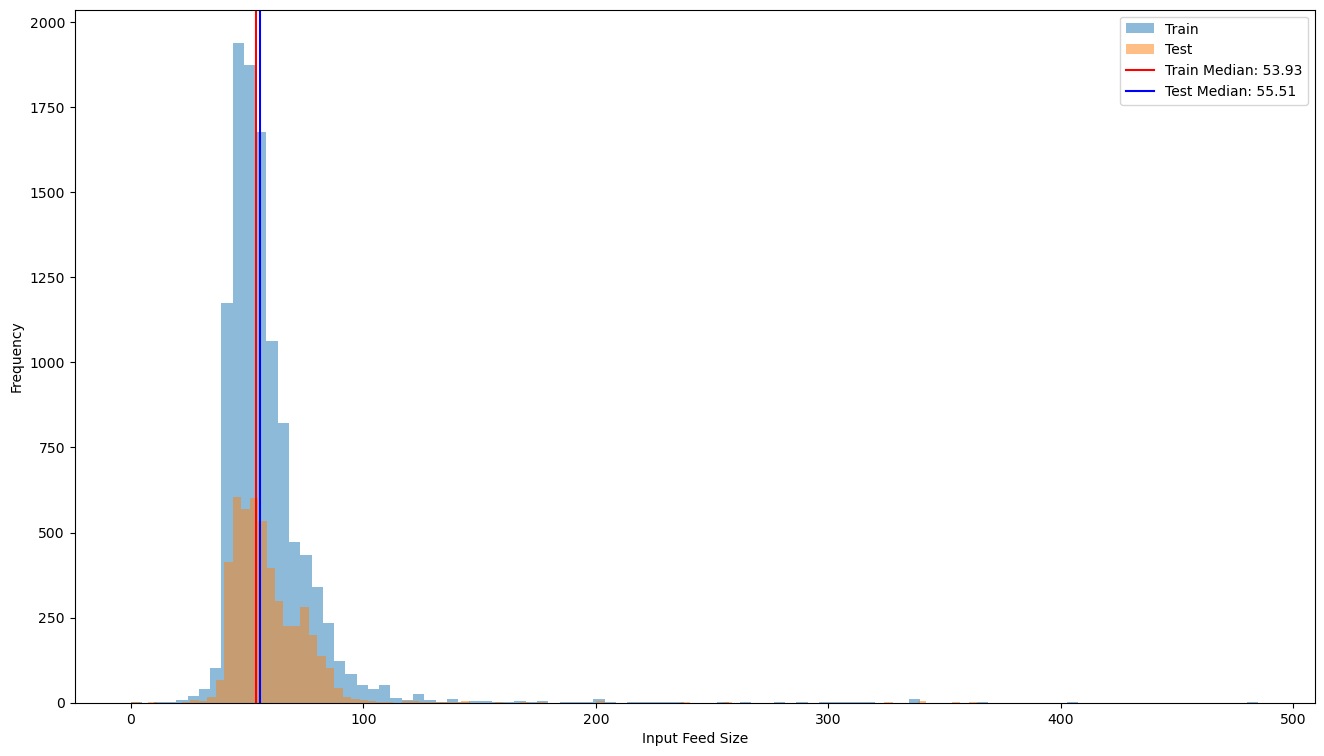

In [22]:
plt.figure(figsize=(16, 9))

# Гистограммы
plt.hist(train_df['rougher.input.feed_size'], bins=100, alpha=0.5, label='Train')
plt.hist(test_df['rougher.input.feed_size'], bins=100, alpha=0.5, label='Test')

# Медианы
train_median = np.median(train_df['rougher.input.feed_size'])
test_median = np.median(test_df['rougher.input.feed_size'].dropna())
plt.axvline(x=train_median, color='r', linestyle='-', label='Train Median: {:.2f}'.format(train_median))
plt.axvline(x=test_median, color='b', linestyle='-', label='Test Median: {:.2f}'.format(test_median))

plt.xlabel('Input Feed Size')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### Суммарная концентрация металлов

Суммируем концентрации трёх металлов (Au, Ag, Pb) и отобразим распределение на трёх этапах:

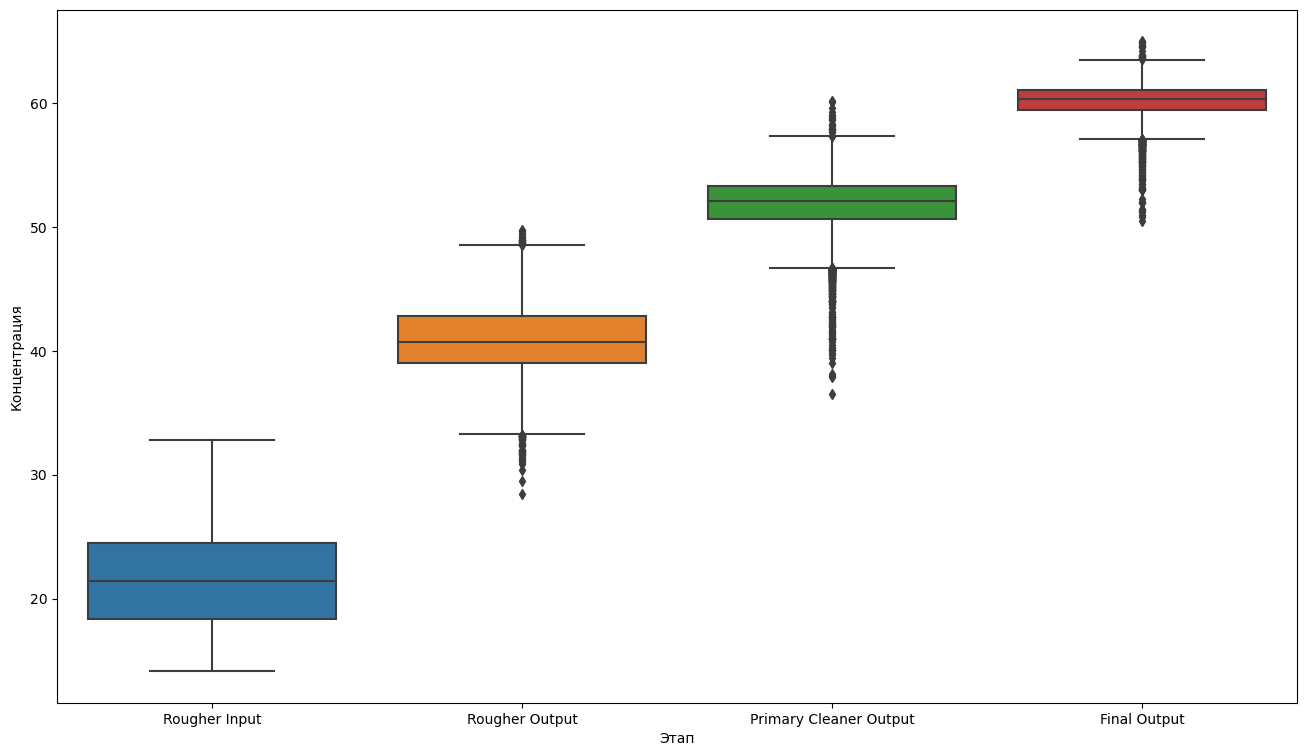

In [23]:
metal_concentrate = pd.DataFrame()


# Начало
metal_concentrate['rougher.input'] = train_df['rougher.input.feed_au']+\
                                     train_df['rougher.input.feed_ag']+\
                                     train_df['rougher.input.feed_pb']

# Черновой концентрат
metal_concentrate['rougher.output'] = train_df['rougher.output.concentrate_au']+\
                                      train_df['rougher.output.concentrate_ag']+\
                                      train_df['rougher.output.concentrate_pb']
# Концентрат после первой очистки
metal_concentrate['primary_cleaner.output'] = train_df['primary_cleaner.output.concentrate_au']+\
                                              train_df['primary_cleaner.output.concentrate_ag']+\
                                              train_df['primary_cleaner.output.concentrate_pb']
# Финальный концентрат
metal_concentrate['final.output'] = train_df['final.output.concentrate_au']+\
                                    train_df['final.output.concentrate_ag']+\
                                    train_df['final.output.concentrate_pb']

# Визуализация распределений
plt.figure(figsize=(16,9))
sns.boxplot(data=metal_concentrate)

plt.ylabel('Концентрация')
plt.xlabel('Этап')
plt.xticks(ticks=[0, 1, 2, 3],
           labels=['Rougher Input',
                   'Rougher Output',
                   'Primary Cleaner Output',
                   'Final Output'])

plt.show()

**Наблюдения**
* Суммарная концентрация металлов стабильно растёт после каждого этапа.
* В распределении присутствует большое количество выбросов ниже первого квартиля.

### Итоги этапа
В ходе анализа данных нам удалось:
1. Определить, как изменяется концентрация металлов (Au, Ag, Pb) на каждом из 4-х этапов обработки.
2. Удостовериться, что распределение размеров гранул на выборках различается незначительно.
3. Отследить динамику изменения суммарной коцентрации металлов на всех этапах.

## Модель

### Функция для вычисления sMAPE

Формулы метрик качества:

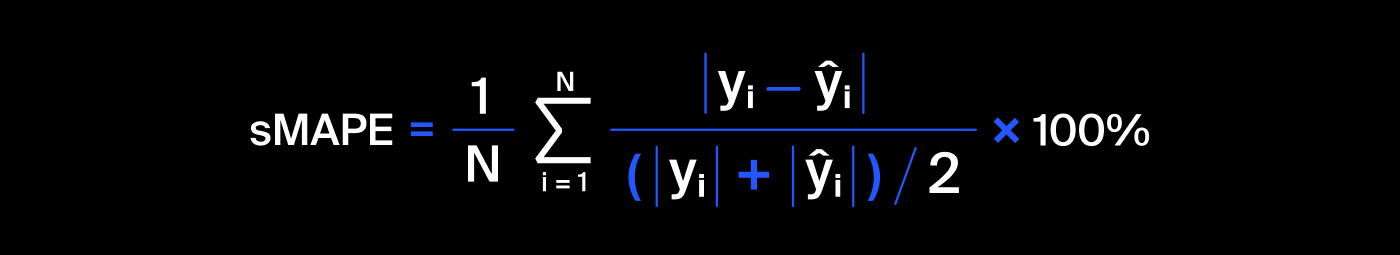
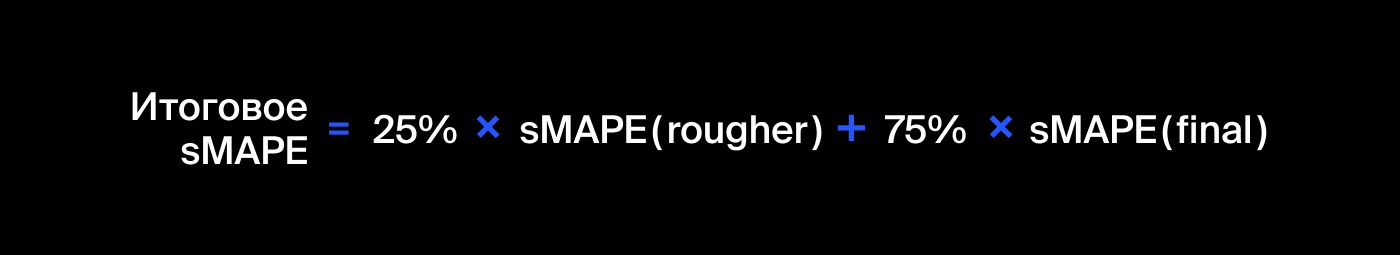

Напишем функцию, вычисляющую итоговую sMAPE.

Обозначения переменных:
* **y** — вектор целевых признаков
* **y_pred** — вектор предсказаний модели

In [24]:
def sMAPE (y, y_pred):
    """ Подсчёт итогового sMAPE по целевым признакам и предсказаниям модели """

    # Черновой концентрат
    y_rougher = y[:,0]
    y_pred_rougher = y_pred[:,0]
    
    # Финальный концентрат
    y_final = y[:,1]
    y_pred_final = y_pred[:,1]
    
    try:
        sMAPE_rogher = (abs(y_rougher - y_pred_rougher) / (abs(y_rougher) + abs(y_pred_rougher)/2)).mean() * 100
    except:
        sMAPE_rogher = 0
    
    try:
        sMAPE_final = ((abs(y_final - y_pred_final) / ((abs(y_final) + abs(y_pred_final)/2)))).mean() * 100
    except:
        sMAPE_final = 0
    
    # Итоговое sMAPE
    sMAPE = 0.25*sMAPE_rogher + 0.75*sMAPE_final
    
    return sMAPE

In [25]:
def sMAPE (y, y_pred):
    """ Подсчёт итогового sMAPE по целевым признакам и предсказаниям модели """

    # Черновой концентрат
    y_rougher = y[:,0]
    y_pred_rougher = y_pred[:,0]
    
    # Финальный концентрат
    y_final = y[:,1]
    y_pred_final = y_pred[:,1]
    
    def smape(y_true, y_pred):
        try:
            smape = (abs(y_true - y_pred) / (abs(y_true) + abs(y_pred)/2)).mean() * 100
        except:
            smape = 0
        return smape
    
    
    # Итоговое sMAPE
    sMAPE = 0.25*smape(y_rougher, y_pred_rougher) + 0.75*smape(y_final, y_pred_final)
    
    return sMAPE

### Обучение моделей

#### Подготовка выборок

В векторе признаков сохраним только те, которые есть в тестовой выборке, а целевыми признаками будут:
* `rougher.output.recovery`
* `final.output.recovery`

In [26]:
test_features = test_df.columns

X = train_df[test_features].drop(['date'],axis=1)
y = train_df[['rougher.output.recovery','final.output.recovery']]
y_arr = np.array(y) 

Так как в тестовой выборке отсутствуют целевые признаки, восстановим их из исходных данных:

In [27]:
test_df = test_df.set_index('date')
test_df['rougher.output.recovery'] = test_df.index.map(full_df.set_index('date')['rougher.output.recovery'])
test_df['final.output.recovery'] = test_df.index.map(full_df.set_index('date')['final.output.recovery'])
test_df = test_df.dropna()

In [28]:
test_features = test_features.drop('date')
X_test = test_df[test_features]
y_test = test_df[['rougher.output.recovery','final.output.recovery']]
y_test_arr = np.array(y_test)

#### Линейная Регрессия

Из-за удаления выбросов, необходимо сбросить индексы:

In [29]:
X.reset_index(drop=True, inplace=True)

В выборке будет 5 сэмплов, рассчитаем размер для каждого:

In [30]:
sample_size=len(X)//5

Проведём кросс-валидацию модели линейной регрессии с помощью функции `cross_val_score()` и метрики нашего проекта `sMAPE`:

In [31]:
# Скорер на основе sMAPE
sMAPE_scorer = make_scorer(sMAPE, greater_is_better=False)

# Инициализация и кросс-валидация
LR_model = LinearRegression()
scores = cross_val_score(LR_model, X, y_arr, cv=5, scoring=sMAPE_scorer)

print(f"Среднее значение sMAPE: {(np.mean(abs(scores)))}")

Среднее значение sMAPE: 5.602868964478799


#### Случайный Лес

In [32]:
# Инициализация модели
RF_model = RandomForestRegressor()

# Сетка гиперпараметров для перебора
param_grid = {
    'n_estimators': range(1, 5),
    'max_depth': range(2, 6)
}

# GridSearchCV с метрикой sMAPE
grid_search = GridSearchCV(estimator=RF_model,
                           param_grid=param_grid,
                           cv=5,
                           scoring=sMAPE_scorer)
grid_search.fit(X, y_arr)

# Вывод наилучших гиперпараметров
print(f"Оптимальные гиперпараметры\n{30*'-'}")
print(f"Глубина: {grid_search.best_params_['max_depth']}")
print(f"Количество деревьев: {grid_search.best_params_['n_estimators']}")

# В значении .best_score_ лежит средня оценка по фолдам для лучшей модели
print(f"{30*'-'}\nСредняя оценка sMAPE: {abs(grid_search.best_score_)}")

Оптимальные гиперпараметры
------------------------------
Глубина: 3
Количество деревьев: 3
------------------------------
Средняя оценка sMAPE: 5.047343128464432


#### Метод опорных векторов

In [33]:
sMAPE_list = []

for i in range (0, len(y)-sample_size, sample_size):
    
    # Индексы для валидационной и тренировочных выборок
    valid_ixs = X.iloc[i: i+sample_size].index
    train_ixs = X.query('index not in @valid_ixs').index
    
    # Выборки
    X_train = X.iloc[train_ixs]
    y_train = y.iloc[train_ixs]
    
    X_valid = X.iloc[valid_ixs]
    y_valid = y.iloc[valid_ixs]
    y_valid_arr = np.array(y_valid)
    
    # Разделение на два целевых признака 
    y_train_1 = y_train.iloc[:, 0]
    y_train_2 = y_train.iloc[:, 1]
    
    # Модель №1 для признака 'rougher.output.recovery'
    SVR1_model = LinearSVR(C=1.0,                        # Регуляризация (штраф за ошибки модели)      
                            dual=True,                   # Проблема двойственности
                            epsilon=0.0,                 # Интервал игнорирования ошибок
                            fit_intercept=True,          # Подгонка свободного члена
                            intercept_scaling=1.0,       # Масштабный коэффициент свободного члена
                            loss='epsilon_insensitive',  # Функция потерь
                            max_iter=1000,               # Число итераций для поиска оптимального веса
                            random_state=0,              # Волшебный рандом
                            tol=1e-05,                   # Условие прекращения итераций
                            verbose=0)                   # Уровень подробности вывода
    
    SVR1_model.fit(X_train, y_train_1)
    y1_pred = SVR1_model.predict(X_valid)
    
    
    # Модель №2 для признака 'final.output.recovery'
    SVR2_model = LinearSVR()
    SVR2_model.fit(X_train, y_train_2)
    y2_pred = SVR2_model.predict(X_valid)
    
    # Преобразование предсказаний для расчёта sMAPE
    y_pred = pd.DataFrame(y1_pred)
    y_pred['final.output.recovery'] = pd.DataFrame(y2_pred)
    y_pred.set_axis(['rougher.output.recovery','final.output.recovery'],axis='columns')
    y_pred = np.array(y_pred)
    
    # Вычисление sMAPE для каждого сэмпла
    sMAPE_list.append(sMAPE(y_valid_arr, y_pred))
    
print(f"Среднее значение sMAPE: {np.mean(sMAPE_list)}")   

Среднее значение sMAPE: 6.825010031958873


Минимальное среднее значение метрики sMAPE на кросс-валидации было получено для модели **Случайного Леса** с глубиной — 2 и количеством деревьев — 3.

Так как sMAPE — это метрика, которую необходимо минимизировать, выбранная модель является лучшей из трёх. Именно её мы и будем проверять.

---

## Тестирование

#### Проверка на тестовой выборке

Проверяем модель случайного леса:

In [34]:
RF_model = RandomForestRegressor(random_state=RANDOM_STATE,
                                 max_depth=3,
                                 n_estimators=2)
RF_model.fit(X_train, y_train)
y_pred = RF_model.predict(X_test)

print(f"sMAPE: {sMAPE(y_test_arr, y_pred)}")

sMAPE: 5.207759751097383


Значение sMAPE немного ухудшилось по сравнению со средним значением на обучающей выборке. Но всё ещё лучше, чем у двух остальных моделей. Следовательно, осталось только проверить нашу модель на адекватность.

#### Проверка модели на адекватность

Создадим константную модель:

In [35]:
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(X_train, y_train)

y_pred= dummy_regr.predict(X_test)

print(f"sMAPE: {sMAPE(y_test_arr, y_pred)}")

sMAPE: 5.706932081365801


Использование обученной модели Случайного Леса даёт преимущество примерно в 0,5 по метрике `sMAPE` по сравнению с константной моделью.

# Выводы
В ходе работы были исследованы наборы данных с параметрами добычи и очистки золотосодержащей руды.
На основе этих данных были обучены три различных типа моделей:
* Линейная Регрессия
* Случайный Лес
* LinearSVM

Лучшей по результатам анализа стала модель **Случайного Леса** с глубиной — 3 и количеством деревьев — 2. Она проверена на тестовой выборке и по метрике sMAPE показала себя на 0,5 лучше, чем константная модель.

Именно модель **Случайного Леса** мы рекомендуем к внедрению.